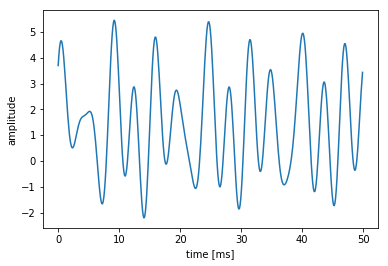

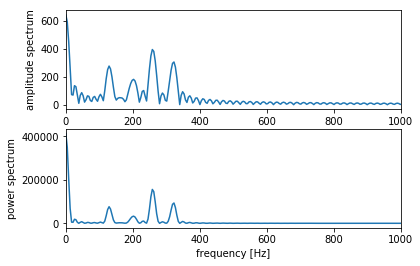

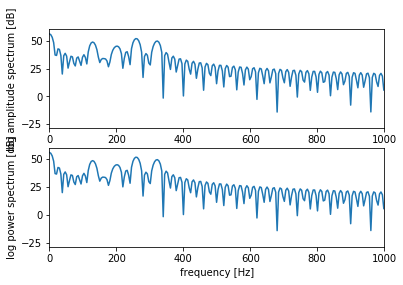

In [7]:
import numpy as np
import pylab

if __name__ == "__main__":
    # 複雑な波を作る
    fs = 8820.0
    time = np.arange(0.0, 0.05, 1 / fs)
    sinwav1 = 1.2 * np.sin(2 * np.pi * 130 * time)  # 振幅1.2、周波数130Hz
    coswav1 = 0.9 * np.cos(2 * np.pi * 200 * time)  # 振幅0.9、周波数200Hz
    sinwav2 = 1.8 * np.sin(2 * np.pi * 260 * time)  # 振幅1.8、周波数260Hz
    coswav2 = 1.4 * np.cos(2 * np.pi * 320 * time)  # 振幅1.4、周波数320Hz
    wavdata = 1.4 + (sinwav1 + coswav1 + sinwav2 + coswav2)
    pylab.plot(time * 1000, wavdata)
    pylab.xlabel("time [ms]")
    pylab.ylabel("amplitude")
    pylab.show()
    
    # 離散フーリエ変換
    n = 2048  # FFTのサンプル数
    dft = np.fft.fft(wavdata, n)
    # 振幅スペクトル
    Adft = np.abs(dft)
    # パワースペクトル
    Pdft = np.abs(dft) ** 2
    # 周波数スケール
    fscale = np.fft.fftfreq(n, d = 1.0 / fs)

    # 振幅スペクトルを描画
    pylab.subplot(211)
    r = 1024
    pylab.plot(fscale[0:r], Adft[0:r])
    pylab.xlabel("frequency [Hz]")
    pylab.ylabel("amplitude spectrum")
    pylab.xlim(0, 1000)

    # パワースペクトルを描画
    pylab.subplot(212)
    pylab.plot(fscale[0:r], Pdft[0:r])
    pylab.xlabel("frequency [Hz]")
    pylab.ylabel("power spectrum")
    pylab.xlim(0, 1000)

    pylab.show()
    
    # 対数振幅スペクトルを描画
    pylab.subplot(211)
    pylab.plot(fscale[0:r], 20 * np.log10(Adft[0:r]))
    pylab.xlabel("frequency [Hz]")
    pylab.ylabel("log amplitude spectrum [dB]")
    pylab.xlim(0, 1000)

    # 対数パワースペクトルを描画
    pylab.subplot(212)
    pylab.plot(fscale[0:r], 10 * np.log10(Pdft[0:r]))
    pylab.xlabel("frequency [Hz]")
    pylab.ylabel("log power spectrum [dB]")
    pylab.xlim(0, 1000)

    pylab.show()

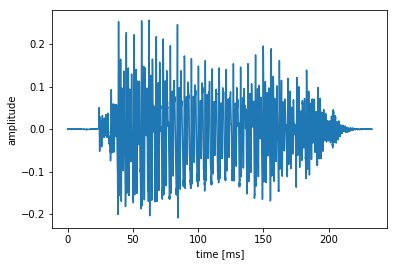

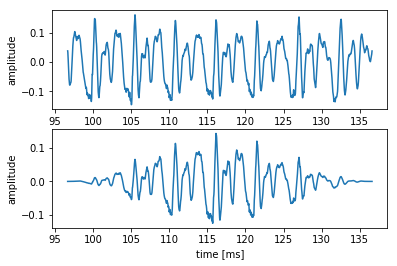

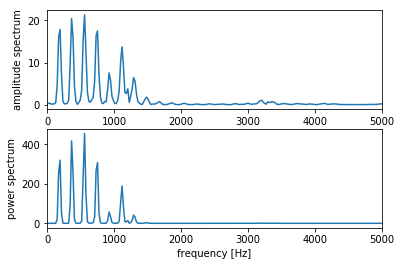

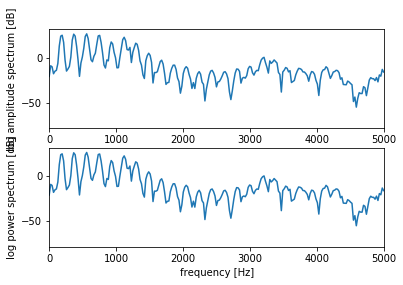

In [17]:
import numpy as np
import pylab
import wave

def wavread(filename):
    wf = wave.open(filename, "r")
    fs = wf.getframerate()
    x = wf.readframes(wf.getnframes())
    x = np.frombuffer(x, dtype="int16") / 32768.0  # (-1, 1)に正規化
    wf.close()
    return x, float(fs)

if __name__ == "__main__":
    # 波形を表示
    wav, fs = wavread("a.wav")
    t = np.arange(0.0, len(wav) / fs, 1/fs)
    pylab.plot(t * 1000, wav)
    pylab.xlabel("time [ms]")
    pylab.ylabel("amplitude")
    pylab.show()
    
    # 母音の定常部分（中心部）のスペクトルを
    center = len(wav) / 2  # 中心のサンプル番号
    cuttime = 0.04         # 切り出す長さ [s]
    wavdata = wav[int(center - cuttime/2*fs) : int(center + cuttime/2*fs)]
    time = t[int(center - cuttime/2*fs): int(center + cuttime/2*fs)]
    pylab.subplot(211)
    pylab.plot(time * 1000, wavdata)
    pylab.ylabel("amplitude")

    # ハニング窓をかける
    hanningWindow = np.hanning(len(wavdata))
    wavdata = wavdata * hanningWindow

    pylab.subplot(212)
    pylab.plot(time * 1000, wavdata)
    pylab.xlabel("time [ms]")
    pylab.ylabel("amplitude")
    pylab.show()
    
    # 離散フーリエ変換
    n = 2048  # FFTのサンプル数
    dft = np.fft.fft(wavdata, n)
    # 振幅スペクトル
    Adft = np.abs(dft)
    # パワースペクトル
    Pdft = np.abs(dft) ** 2
    # 周波数スケール
    fscale = np.fft.fftfreq(n, d = 1.0 / fs)

    # 振幅スペクトルを描画
    pylab.subplot(211)
    r = 1024
    pylab.plot(fscale[0:r], Adft[0:r])
    pylab.xlabel("frequency [Hz]")
    pylab.ylabel("amplitude spectrum")
    pylab.xlim(0, 5000)

    # パワースペクトルを描画
    pylab.subplot(212)
    pylab.plot(fscale[0:r], Pdft[0:r])
    pylab.xlabel("frequency [Hz]")
    pylab.ylabel("power spectrum")
    pylab.xlim(0, 5000)

    pylab.show()
    
    # 対数振幅スペクトルを描画
    pylab.subplot(211)
    pylab.plot(fscale[0:r], 20 * np.log10(Adft[0:r]))
    pylab.xlabel("frequency [Hz]")
    pylab.ylabel("log amplitude spectrum [dB]")
    pylab.xlim(0, 5000)

    # 対数パワースペクトルを描画
    pylab.subplot(212)
    pylab.plot(fscale[0:r], 10 * np.log10(Pdft[0:r]))
    pylab.xlabel("frequency [Hz]")
    pylab.ylabel("log power spectrum [dB]")
    pylab.xlim(0, 5000)

    pylab.show()